<ipython-input-3-829edfc5e226>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description']).reset_index(drop=True)
<ipython-input-3-829edfc5e226>:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv(test_path, sep=':::', names=['Title', 'Description']).reset_index(drop=True)
<ipython-input-3-829edfc5e226>:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by

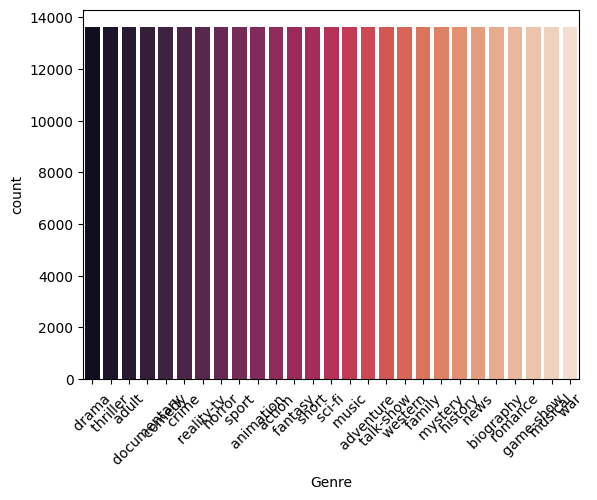

Accuracy: 0.5426383763837639
Running Time: 3.71 Seconds
               precision    recall  f1-score   support

      action        0.36      0.48      0.41      1314
       adult        0.50      0.53      0.51       590
   adventure        0.31      0.25      0.28       775
   animation        0.31      0.23      0.26       498
   biography        0.04      0.02      0.03       264
      comedy        0.58      0.53      0.55      7446
       crime        0.17      0.18      0.17       505
 documentary        0.72      0.72      0.72     13096
       drama        0.64      0.56      0.60     13612
      family        0.25      0.22      0.23       783
     fantasy        0.16      0.13      0.14       322
   game-show        0.77      0.67      0.72       193
     history        0.10      0.06      0.07       243
      horror        0.52      0.68      0.59      2204
       music        0.39      0.72      0.51       731
     musical        0.19      0.10      0.13       276
     mys

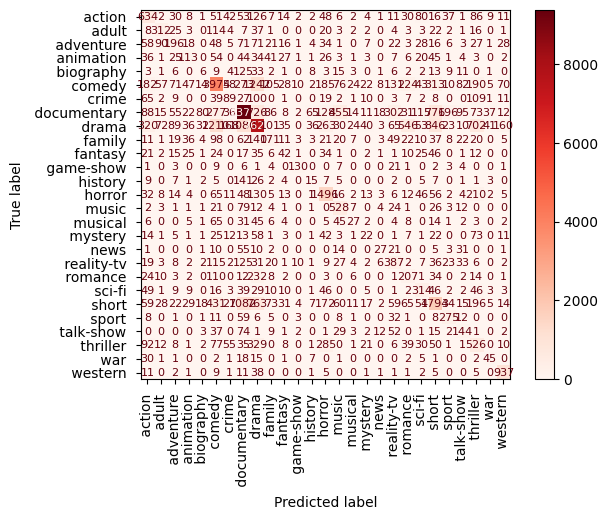

,Title,Description,Actual_Genre,Predicted_Genre
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",thriller,comedy
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",comedy,drama
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary,documentary
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama,drama
4,Er nu zhai (1955),Before he was known internationally as a mart...,drama,drama
5,Riddle Room (2016),Emily Burns is being held captive in a room w...,horror,thriller
6,L'amica (1969),The beautiful but neglected wife of a brillia...,drama,comedy
7,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...,comedy,comedy
8,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...,documentary,documentary
9,Press (2011),Press is a story of young people overwhelmed ...,drama,short


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from time import time
import seaborn as sns
import matplotlib.pyplot as plt

# Load training data
train_path = "/content/drive/MyDrive/movie/train_data.txt"
train = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description']).reset_index(drop=True)

# Load test data
test_path = "/content/drive/MyDrive/movie/test_data.txt"
test = pd.read_csv(test_path, sep=':::', names=['Title', 'Description']).reset_index(drop=True)

# Load actual genre labels for test data
actual_path = "/content/drive/MyDrive/movie/test_data_solution.txt"
y_actual = pd.read_csv(actual_path, sep=':::', usecols=[2], header=None).rename(columns={2: 'Actual_Genre'})

# Using TfidfVectorizer to convert text data into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(lowercase=True,
                                   ngram_range=(1, 1),
                                   stop_words='english',
                                   min_df=2)

x_train = tfidf_vectorizer.fit_transform(train['Description'])
x_test = tfidf_vectorizer.transform(test['Description'])

# Resampling the training data using RandomOverSampler
sampler = RandomOverSampler()
x_train_resampled, y_train_resampled = sampler.fit_resample(x_train, train['Genre'])

# Display the genre distribution after oversampling
sns.countplot(x=y_train_resampled, palette='rocket')
plt.xticks(rotation=45)
plt.show()

# Naive Bayes Model
NB = MultinomialNB(alpha=0.3)
start_time = time()
NB.fit(x_train_resampled, y_train_resampled)
y_pred = NB.predict(x_test)
print('Accuracy:', accuracy_score(y_actual, y_pred))
end_time = time()
print('Running Time:', round(end_time - start_time, 2), 'Seconds')
print(classification_report(y_actual, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_actual, y_pred, labels=NB.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NB.classes_)
cmd.plot(cmap=plt.cm.Reds, xticks_rotation='vertical', text_kw={'size': 8})
plt.show()

# Display some predictions
pd.concat([pd.concat([test, y_actual], axis=1), pd.Series(y_pred)], axis=1).rename(columns={0: 'Predicted_Genre'}).head(10)
